<a href="https://colab.research.google.com/github/VinhPhamAI/Data-Analyst/blob/main/Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import seaborn as sns
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import ast
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Cleaning and Preprocessing

**Importing dataset**

In [379]:
df1 = pd.read_csv("commit_facebook 1.csv")
df2 = pd.read_csv("commit_facebook 2.csv")
df3 = pd.read_csv("commit_facebook 3.csv")
df4 = pd.read_csv("commit_facebook 4.csv")

**Merge multiple DataFrames into a single DataFrame**

In [380]:
df = pd.concat([df1, df2, df3, df4], axis=0)
df

,Commit ID,Commit Message,Author Name,Author Email,Created at,Updated at,Files Changed,Branch,Contributor,All Checks Passed
0,d960b9e38c062584ff6cfb1a70e1512509a966e7,"docs: fix link of ""Building for Relative Paths...",ryan.c,jackblackevo@gmail.com,2022-09-08 07:40:47,2022-09-08 07:40:47,['docusaurus/docs/advanced-configuration.md'],f34d88e30c7d8be7181f728d1abc4fd8d5cd07d3,jackblackevo,True
1,f34d88e30c7d8be7181f728d1abc4fd8d5cd07d3,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:52:20,2022-07-05 18:52:20,['docusaurus/docs/setting-up-your-editor.md'],c378572024967fee15d97da1b6fbfcd2894b4b66,matrush,False
2,c378572024967fee15d97da1b6fbfcd2894b4b66,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:49:51,2022-07-05 18:49:51,['docusaurus/docs/adding-typescript.md'],a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,matrush,False
3,a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:30,2022-07-05 18:48:30,['docusaurus/docs/deployment.md'],bcff1928dac6f9d708613dff5eac36c2834bc139,matrush,False
4,bcff1928dac6f9d708613dff5eac36c2834bc139,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:07,2022-07-05 18:48:07,['docusaurus/docs/adding-a-router.md'],c2cbaaf006e9ba70888565ed33b4990985f5fc44,matrush,False
...,...,...,...,...,...,...,...,...,...,...
625,9800d053166fdbc36a9661a79d99c63ef2bd45c0,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:58:47,2016-07-15 19:58:47,"['.eslintrc', 'devServer.js', 'package.json', ...",2badb45121503202bc13a57d2de4236b68493656,gaearon,True
626,2badb45121503202bc13a57d2de4236b68493656,Explain what it is,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:08:21,2016-07-15 19:08:21,['README.md'],86fa5b3f78013787b4f6801b989edb700feaaec7,gaearon,True
627,86fa5b3f78013787b4f6801b989edb700feaaec7,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:07:31,2016-07-15 19:07:31,"['.babelrc', '.gitignore', 'build/bundle.js', ...",9c72b8137c5769221b1eedcbd88265a432b3caa9,gaearon,True
628,9c72b8137c5769221b1eedcbd88265a432b3caa9,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,2016-07-15 17:52:45,2016-07-15 17:52:45,"['.gitignore', 'build/bundle.js', 'cli.js', 'i...",003d9e7b52c3a91cb584b3afd78cd06c539f13be,vjeux,True


In [381]:
df.isna().sum()

Commit ID              0
Commit Message         0
Author Name            0
Author Email           0
Created at             0
Updated at             0
Files Changed          0
Branch                 1
Contributor          166
All Checks Passed      0
dtype: int64

**Remove duplicate columns get from data extraction**

In [382]:
df.drop_duplicates(inplace = True)

**Reset the index of the merged DataFrame**

In [383]:
df = df.reset_index(drop = True)

In [384]:
df

,Commit ID,Commit Message,Author Name,Author Email,Created at,Updated at,Files Changed,Branch,Contributor,All Checks Passed
0,d960b9e38c062584ff6cfb1a70e1512509a966e7,"docs: fix link of ""Building for Relative Paths...",ryan.c,jackblackevo@gmail.com,2022-09-08 07:40:47,2022-09-08 07:40:47,['docusaurus/docs/advanced-configuration.md'],f34d88e30c7d8be7181f728d1abc4fd8d5cd07d3,jackblackevo,True
1,f34d88e30c7d8be7181f728d1abc4fd8d5cd07d3,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:52:20,2022-07-05 18:52:20,['docusaurus/docs/setting-up-your-editor.md'],c378572024967fee15d97da1b6fbfcd2894b4b66,matrush,False
2,c378572024967fee15d97da1b6fbfcd2894b4b66,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:49:51,2022-07-05 18:49:51,['docusaurus/docs/adding-typescript.md'],a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,matrush,False
3,a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:30,2022-07-05 18:48:30,['docusaurus/docs/deployment.md'],bcff1928dac6f9d708613dff5eac36c2834bc139,matrush,False
4,bcff1928dac6f9d708613dff5eac36c2834bc139,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:07,2022-07-05 18:48:07,['docusaurus/docs/adding-a-router.md'],c2cbaaf006e9ba70888565ed33b4990985f5fc44,matrush,False
...,...,...,...,...,...,...,...,...,...,...
2795,9800d053166fdbc36a9661a79d99c63ef2bd45c0,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:58:47,2016-07-15 19:58:47,"['.eslintrc', 'devServer.js', 'package.json', ...",2badb45121503202bc13a57d2de4236b68493656,gaearon,True
2796,2badb45121503202bc13a57d2de4236b68493656,Explain what it is,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:08:21,2016-07-15 19:08:21,['README.md'],86fa5b3f78013787b4f6801b989edb700feaaec7,gaearon,True
2797,86fa5b3f78013787b4f6801b989edb700feaaec7,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:07:31,2016-07-15 19:07:31,"['.babelrc', '.gitignore', 'build/bundle.js', ...",9c72b8137c5769221b1eedcbd88265a432b3caa9,gaearon,True
2798,9c72b8137c5769221b1eedcbd88265a432b3caa9,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,2016-07-15 17:52:45,2016-07-15 17:52:45,"['.gitignore', 'build/bundle.js', 'cli.js', 'i...",003d9e7b52c3a91cb584b3afd78cd06c539f13be,vjeux,True


In [385]:
df['Branch'].value_counts() 

cee26589ff919e946030a5651a93ccba78a93293    6
749a76d291d6b07681d0941eeb23112c6970d3c4    4
c20ccecfa1cf130a47d37908dc54959c618ce8ea    3
c2a163a350d7dcd70ee446f690b6016fe9308f1f    3
3f5dea91c1721b233e5a2b514ff9ea6fbc76ff97    3
                                           ..
7aaa463547386ee9589cf4ff42bc1d66126b0054    1
0f5bb0d937a9eef5a63fd3b59181bee6069a6269    1
6035abf8f307a25c8e461149393af1a045d3b6e0    1
678ef7609e48936134e81c08d2e731e256e4bc11    1
003d9e7b52c3a91cb584b3afd78cd06c539f13be    1
Name: Branch, Length: 2758, dtype: int64

In [386]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
df.sort_values('Updated at', inplace = True)

In [387]:
df = df.reset_index(drop = True)

In [388]:
df

,Commit ID,Commit Message,Author Name,Author Email,Created at,Updated at,Files Changed,Branch,Contributor,All Checks Passed
0,003d9e7b52c3a91cb584b3afd78cd06c539f13be,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,2016-07-15 16:46:37,2016-07-15 16:46:37,"['LICENSE', 'PATENTS', 'README.md']",NaN,vjeux,True
1,9c72b8137c5769221b1eedcbd88265a432b3caa9,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,2016-07-15 17:52:45,2016-07-15 17:52:45,"['.gitignore', 'build/bundle.js', 'cli.js', 'i...",003d9e7b52c3a91cb584b3afd78cd06c539f13be,vjeux,True
2,86fa5b3f78013787b4f6801b989edb700feaaec7,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:07:31,2016-07-15 19:07:31,"['.babelrc', '.gitignore', 'build/bundle.js', ...",9c72b8137c5769221b1eedcbd88265a432b3caa9,gaearon,True
3,2badb45121503202bc13a57d2de4236b68493656,Explain what it is,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:08:21,2016-07-15 19:08:21,['README.md'],86fa5b3f78013787b4f6801b989edb700feaaec7,gaearon,True
4,9800d053166fdbc36a9661a79d99c63ef2bd45c0,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:58:47,2016-07-15 19:58:47,"['.eslintrc', 'devServer.js', 'package.json', ...",2badb45121503202bc13a57d2de4236b68493656,gaearon,True
...,...,...,...,...,...,...,...,...,...,...
2795,bcff1928dac6f9d708613dff5eac36c2834bc139,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:07,2022-07-05 18:48:07,['docusaurus/docs/adding-a-router.md'],c2cbaaf006e9ba70888565ed33b4990985f5fc44,matrush,False
2796,a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:30,2022-07-05 18:48:30,['docusaurus/docs/deployment.md'],bcff1928dac6f9d708613dff5eac36c2834bc139,matrush,False
2797,c378572024967fee15d97da1b6fbfcd2894b4b66,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:49:51,2022-07-05 18:49:51,['docusaurus/docs/adding-typescript.md'],a45ee3b091b3a7c7151a98ebaf5ec460eda7d614,matrush,False
2798,f34d88e30c7d8be7181f728d1abc4fd8d5cd07d3,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:52:20,2022-07-05 18:52:20,['docusaurus/docs/setting-up-your-editor.md'],c378572024967fee15d97da1b6fbfcd2894b4b66,matrush,False


In [389]:
df['Additions commit'] = df['Commit Message'].str.len()
df.drop('Commit ID', axis = 1, inplace = True)
df.drop('Created at', axis = 1, inplace = True)
df.drop('Branch', axis = 1, inplace = True)
df

,Commit Message,Author Name,Author Email,Updated at,Files Changed,Contributor,All Checks Passed,Additions commit
0,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,2016-07-15 16:46:37,"['LICENSE', 'PATENTS', 'README.md']",vjeux,True,14
1,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,2016-07-15 17:52:45,"['.gitignore', 'build/bundle.js', 'cli.js', 'i...",vjeux,True,56
2,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:07:31,"['.babelrc', '.gitignore', 'build/bundle.js', ...",gaearon,True,30
3,Explain what it is,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:08:21,['README.md'],gaearon,True,18
4,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:58:47,"['.eslintrc', 'devServer.js', 'package.json', ...",gaearon,True,28
...,...,...,...,...,...,...,...,...
2795,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:07,['docusaurus/docs/adding-a-router.md'],matrush,False,89
2796,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:30,['docusaurus/docs/deployment.md'],matrush,False,85
2797,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:49:51,['docusaurus/docs/adding-typescript.md'],matrush,False,107
2798,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:52:20,['docusaurus/docs/setting-up-your-editor.md'],matrush,False,85


In [390]:
df['Files Changed'].unique()

array(["['LICENSE', 'PATENTS', 'README.md']",
       "['.gitignore', 'build/bundle.js', 'cli.js', 'index.css', 'index.html', 'index.js', 'package.json', 'webpack.config.js']",
       "['.babelrc', '.gitignore', 'build/bundle.js', 'devServer.js', 'index.css', 'index.js', 'package.json', 'src/App.css', 'src/App.js', 'src/index.js', 'webpack.config.dev.js', 'webpack.config.js', 'webpack.config.prod.js']",
       ...,
       "['packages/cra-template-typescript/package.json', 'packages/cra-template/package.json', 'packages/create-react-app/package.json', 'packages/eslint-config-react-app/package.json', 'packages/react-dev-utils/package.json', 'packages/react-error-overlay/package.json', 'packages/react-scripts/package.json']",
       "['.eslintignore', '.eslintrc.json', '.github/workflows/build.yml', '.github/workflows/lint.yml', '.gitignore', '.prettierignore', 'docusaurus/docs/adding-typescript.md', 'docusaurus/docs/advanced-configuration.md', 'docusaurus/docs/loading-graphql-files.md', '

**Create a Files Changed Count Column**

In [391]:
df['Files Changed'] = df['Files Changed'].apply(ast.literal_eval)
df['Files Changed Count'] = df['Files Changed'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df


,Commit Message,Author Name,Author Email,Updated at,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count
0,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,2016-07-15 16:46:37,"[LICENSE, PATENTS, README.md]",vjeux,True,14,3
1,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,2016-07-15 17:52:45,"[.gitignore, build/bundle.js, cli.js, index.cs...",vjeux,True,56,8
2,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:07:31,"[.babelrc, .gitignore, build/bundle.js, devSer...",gaearon,True,30,13
3,Explain what it is,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:08:21,[README.md],gaearon,True,18,1
4,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,2016-07-15 19:58:47,"[.eslintrc, devServer.js, package.json, src/Ap...",gaearon,True,28,6
...,...,...,...,...,...,...,...,...,...
2795,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:07,[docusaurus/docs/adding-a-router.md],matrush,False,89,1
2796,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:48:30,[docusaurus/docs/deployment.md],matrush,False,85,1
2797,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:49:51,[docusaurus/docs/adding-typescript.md],matrush,False,107,1
2798,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,2022-07-05 18:52:20,[docusaurus/docs/setting-up-your-editor.md],matrush,False,85,1


# Data Analyst

**Summary statistics of the numerical columns**

In [392]:
numerical_columns = ['Additions commit', 'Files Changed Count']

numerical_stats = df[numerical_columns].describe()
numerical_stats

,Additions commit,Files Changed Count
count,2800.000000,2800.000000
mean,112.637857,2.823929
std,193.286113,7.425471
min,3.000000,0.000000
25%,32.000000,1.000000
50%,54.000000,1.000000
75%,127.000000,2.000000
max,4585.000000,174.000000


**Top 5 longest Commit Message**

In [393]:
sorted_df = df.sort_values('Additions commit', ascending=False)
sorted_df.head(5)

,Commit Message,Author Name,Author Email,Updated at,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count
805,Add runtime error overlay (#1101)\n\n* Add red...,Joe Haddad,timer150@gmail.com,2017-03-07 02:59:57,"[packages/react-dev-utils/ansiHTML.js, package...",Timer,True,4585,5
2454,Remove React.FC from Typescript template (#817...,Retsam,Retsam@users.noreply.github.com,2020-01-22 21:32:49,[packages/cra-template-typescript/template/src...,Retsam,True,4027,1
1449,Add support for yarn and lerna monorepos. (#37...,bradfordlemley,bradfordlemley@gmail.com,2018-02-01 20:58:18,"[.travis.yml, appveyor.yml, packages/react-scr...",bradfordlemley,True,2190,33
549,add logging of existing default port process o...,Ian McNally,ianmcnally@gmail.com,2016-11-22 20:44:21,"[packages/react-dev-utils/README.md, packages/...",ianmcnally,True,1934,4
2071,Speed up TypeScript projects (#5903)\n\nAs a l...,Tomáš Szabo,tomas.szabo@deftomat.com,2019-02-08 03:34:52,[packages/react-dev-utils/WebpackDevServerUtil...,deftomat,True,1685,11


**Top 5 the most Files Changed Count each commit**

In [394]:
file_df = df.sort_values('Files Changed Count', ascending = False)
file_df.head()

,Commit Message,Author Name,Author Email,Updated at,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count
2781,Merge branch 'main' into patch-1,Chaoshuai Lü,matrush@qq.com,2022-06-17 17:27:23,"[.eslintignore, .eslintrc.json, .github/CODEOW...",matrush,False,32,174
1203,BSD+Patents -> MIT (#3189)\n\n* File headers B...,Sophie Alpert,git@sophiebits.com,2017-09-26 09:30:05,"[LICENSE, PATENTS, packages/babel-preset-react...",sophiebits,True,85,162
2383,Add template support (#7716)\n\n* Add template...,Brody McKee,mrmckeb@users.noreply.github.com,2019-10-24 22:17:41,"[azure-pipelines.yml, docusaurus/docs/adding-t...",mrmckeb,True,127,158
799,Fix internal linting setup and add missing hea...,Dan Abramov,dan.abramov@gmail.com,2017-03-06 14:20:29,"[.eslintignore, packages/react-scripts/babelrc...",gaearon,True,58,81
641,Use a more sophisticated template for end-to-e...,Fabrizio Castellarin,f.castellarin@gmail.com,2017-01-23 19:43:16,"[.travis.yml, package.json, packages/create-re...",EnoahNetzach,True,960,78


**Top 5 most commiting people**

In [395]:
df['Author Name'].value_counts().head(5)

Dan Abramov          650
Joe Haddad           293
Ian Sutherland       153
Kristofer Selbekk     91
Ian Schmitz           85
Name: Author Name, dtype: int64

**Top 5 most active contributors**

In [396]:
contributors = df['Contributor'].value_counts()
contributors.head(5)

gaearon       655
Timer         293
iansu         153
ianschmitz     85
selbekk        77
Name: Contributor, dtype: int64

**Top 5 most popular type of email**

In [397]:
df["Email Type"] = df["Author Email"].str.extract(r'@(\w+\.\w+)')
email_type_counts = df['Email Type'].value_counts()
email_type_counts.head(5)

gmail.com           1767
users.noreply        308
iansutherland.ca     153
fb.com                62
iki.fi                51
Name: Email Type, dtype: int64

**Top 5 Author Email make the most commit**

In [398]:
top_5_emails = df['Author Email'].value_counts().head(5)
top_5_authors = df[df['Author Email'].isin(top_5_emails.index)]['Author Name'].unique()
top_5_contributors = pd.DataFrame({'Author Email': top_5_emails.index, 'Commits': top_5_emails.values})
top_5_contributors['Author Name'] = top_5_contributors['Author Email'].map(dict(zip(top_5_emails.index, top_5_authors)))
top_5_contributors

,Author Email,Commits,Author Name
0,dan.abramov@gmail.com,635,Dan Abramov
1,timer150@gmail.com,292,Joe Haddad
2,ian@iansutherland.ca,153,Ian Schmitz
3,ianschmitz@gmail.com,85,Ian Sutherland
4,selbeezy@gmail.com,65,Dan


**Find the most commons word in commit messages**

In [399]:
from nltk.corpus import stopwords
from collections import Counter
commit_messages = ' '.join(df['Commit Message'].astype(str).values)
tokens = nltk.word_tokenize(commit_messages)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
word_frequency = Counter(filtered_tokens)
most_common_word = word_frequency.most_common()
print ("The most commons word in commit messages : " + most_common_word[0][0])
print ("Frequency : " + str(most_common_word[0][1]))

The most commons word in commit messages : add
Frequency : 855


In [400]:
word_frequency.most_common(5)

[('add', 855), ('update', 751), ('fix', 583), ('remove', 303), ('use', 300)]

**Find the file that changes the most times**

In [401]:
df_exploded = df.explode('Files Changed')

file_counts = df_exploded['Files Changed'].value_counts()

most_changed_file = file_counts.idxmax()
file_change_frequency = file_counts.max()

print("Most changed file:", most_changed_file)
print("Frequency:", file_change_frequency)

Most changed file: packages/react-scripts/package.json
Frequency: 392


**The frequency of commits**

Calculate the frequency of commits by days

In [402]:
df.set_index('Updated at', inplace = True)
commit_frequency_days = df.resample('D').size()
commit_frequency_days.sort_values()

Updated at
2021-11-30     0
2021-09-16     0
2021-09-17     0
2021-09-18     0
2021-09-19     0
              ..
2018-01-08    29
2016-09-23    31
2017-05-19    32
2018-10-01    35
2018-10-07    54
Length: 2247, dtype: int64

Calculate the frequency of commits by weeks

In [403]:
commit_frequency_weeks = df.resample('W').size()
commit_frequency_weeks.sort_values()

Updated at
2022-01-09      0
2018-09-09      0
2018-09-16      0
2022-04-03      0
2021-01-31      0
             ... 
2018-09-30     71
2017-05-21    105
2018-01-14    107
2016-07-24    113
2018-10-07    134
Length: 322, dtype: int64

Calculate the frequency of commits by months

In [404]:
commit_frequency_months = df.resample('M').size()
commit_frequency_months.sort_values()

Updated at
2022-08-31      0
2022-09-30      1
2022-05-31      1
2022-02-28      1
2021-01-31      2
             ... 
2016-09-30    163
2018-01-31    169
2017-05-31    180
2016-07-31    221
2018-10-31    260
Length: 75, dtype: int64

Calculate the frequency of commits by years

In [405]:
commit_frequency_years = df.resample('Y').size()
commit_frequency_years.sort_values()

Updated at
2022-12-31     50
2021-12-31     91
2020-12-31    209
2019-12-31    412
2016-12-31    630
2017-12-31    650
2018-12-31    758
dtype: int64

**Find the individuals who have a high percentage of "All Checks Passed"**

In [406]:
filtered_commit = df.groupby('Author Name').filter(lambda x: len(x) > 10)

In [407]:
grouped_commit = filtered_commit.groupby('Author Name').agg({'All Checks Passed': 'mean'})

In [408]:
filtered_grouped_df = grouped_commit[grouped_commit['All Checks Passed'] > 0.8]

In [409]:
filtered_grouped_df = filtered_grouped_df.sort_values(by='All Checks Passed', ascending=False)
commit_count = df['Author Name'].value_counts()
filtered_grouped_df = filtered_grouped_df.assign(commit_count=commit_count)
filtered_grouped_df

,All Checks Passed,commit_count
Author Name,,
Ade Viankakrisna Fadlil,1.000000,23
Andreas Cederström,1.000000,18
Christopher Chedeau,1.000000,28
Jack Zhao,1.000000,24
Jeffrey Posnick,1.000000,11
Joe Haddad,1.000000,293
Kristofer Selbekk,1.000000,91
Michaël De Boey,1.000000,18
Ville Immonen,1.000000,50


In [410]:
df['Author Name'].value_counts()

Dan Abramov          650
Joe Haddad           293
Ian Sutherland       153
Kristofer Selbekk     91
Ian Schmitz           85
                    ... 
Erik J. Sturcke        1
Anthony                1
Jared Palmer           1
gulderov               1
ryan.c                 1
Name: Author Name, Length: 930, dtype: int64

**Who changed the most files**

In [411]:
author_max_files_changed = df.loc[df['Files Changed Count'].idxmax(), 'Author Name']
author_max_files_changed

'Chaoshuai Lü'

In [412]:
top_5_authors = df.nlargest(5, 'Files Changed Count')[['Author Name', 'Files Changed Count']]
top_5_authors

,Author Name,Files Changed Count
Updated at,,
2022-06-17 17:27:23,Chaoshuai Lü,174
2017-09-26 09:30:05,Sophie Alpert,162
2019-10-24 22:17:41,Brody McKee,158
2017-03-06 14:20:29,Dan Abramov,81
2017-01-23 19:43:16,Fabrizio Castellarin,78


**The people who have changed the most files in total**

In [413]:
total_file_changed = df.groupby('Author Name')['Files Changed Count'].sum()
total_file_changed_sorted = total_file_changed.sort_values(ascending = False)

total_file_changed_sorted.head()

Author Name
Dan Abramov          1430
Joe Haddad           1035
Ian Schmitz           465
Ian Sutherland        450
Kristofer Selbekk     421
Name: Files Changed Count, dtype: int64

# Data Visualization

In [414]:
df.reset_index(inplace=True)

In [415]:
df

,Updated at,Commit Message,Author Name,Author Email,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count,Email Type
0,2016-07-15 16:46:37,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,"[LICENSE, PATENTS, README.md]",vjeux,True,14,3,gmail.com
1,2016-07-15 17:52:45,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,"[.gitignore, build/bundle.js, cli.js, index.cs...",vjeux,True,56,8,fb.com
2,2016-07-15 19:07:31,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,"[.babelrc, .gitignore, build/bundle.js, devSer...",gaearon,True,30,13,gmail.com
3,2016-07-15 19:08:21,Explain what it is,Dan Abramov,dan.abramov@gmail.com,[README.md],gaearon,True,18,1,gmail.com
4,2016-07-15 19:58:47,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,"[.eslintrc, devServer.js, package.json, src/Ap...",gaearon,True,28,6,gmail.com
...,...,...,...,...,...,...,...,...,...,...
2795,2022-07-05 18:48:07,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-a-router.md],matrush,False,89,1,qq.com
2796,2022-07-05 18:48:30,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/deployment.md],matrush,False,85,1,qq.com
2797,2022-07-05 18:49:51,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-typescript.md],matrush,False,107,1,qq.com
2798,2022-07-05 18:52:20,Merge pull request #12558 from danielrentz/pat...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/setting-up-your-editor.md],matrush,False,85,1,qq.com


**Overall trend in the number of commits over time**

In [416]:
commit_counts = df.groupby(df['Updated at'].dt.date).size()
commit_counts = commit_counts.reset_index(name = 'Commit Count')
commit_counts

,Updated at,Commit Count
0,2016-07-15,13
1,2016-07-16,4
2,2016-07-17,27
3,2016-07-18,18
4,2016-07-19,7
...,...,...
770,2022-06-23,2
771,2022-06-30,2
772,2022-07-03,1
773,2022-07-05,6


Text(0, 0.5, 'Number of Commits')

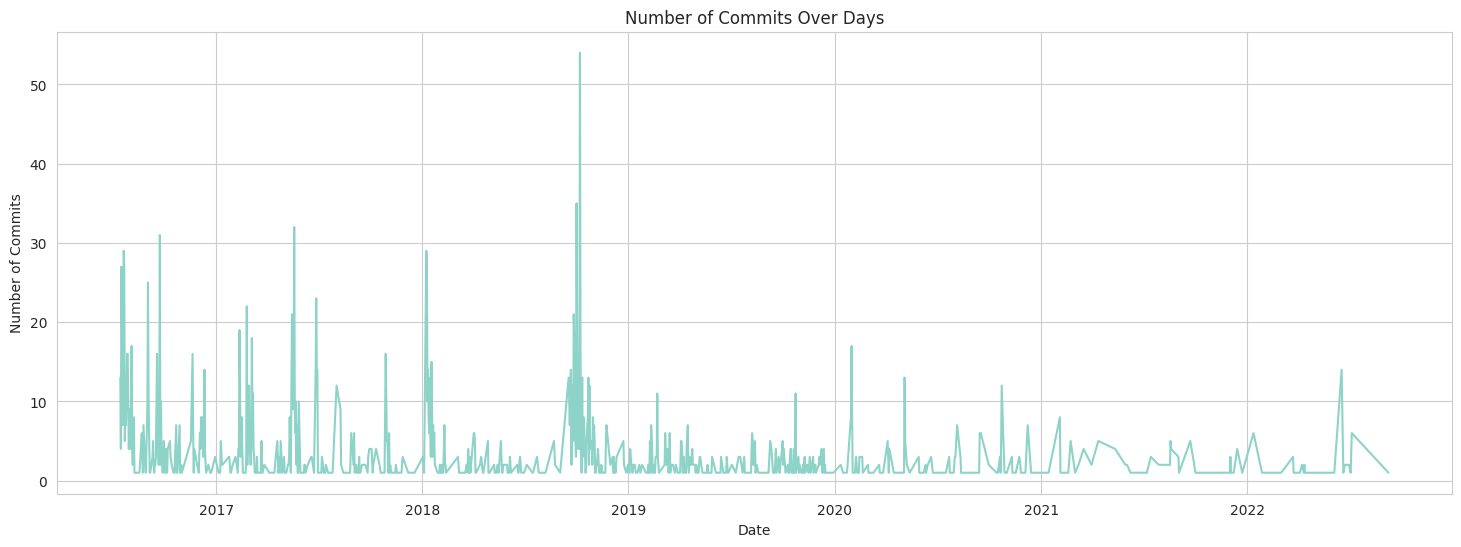

In [417]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=commit_counts, x='Updated at', y='Commit Count')

plt.title('Number of Commits Over Days')
plt.xlabel('Date')
plt.ylabel('Number of Commits')

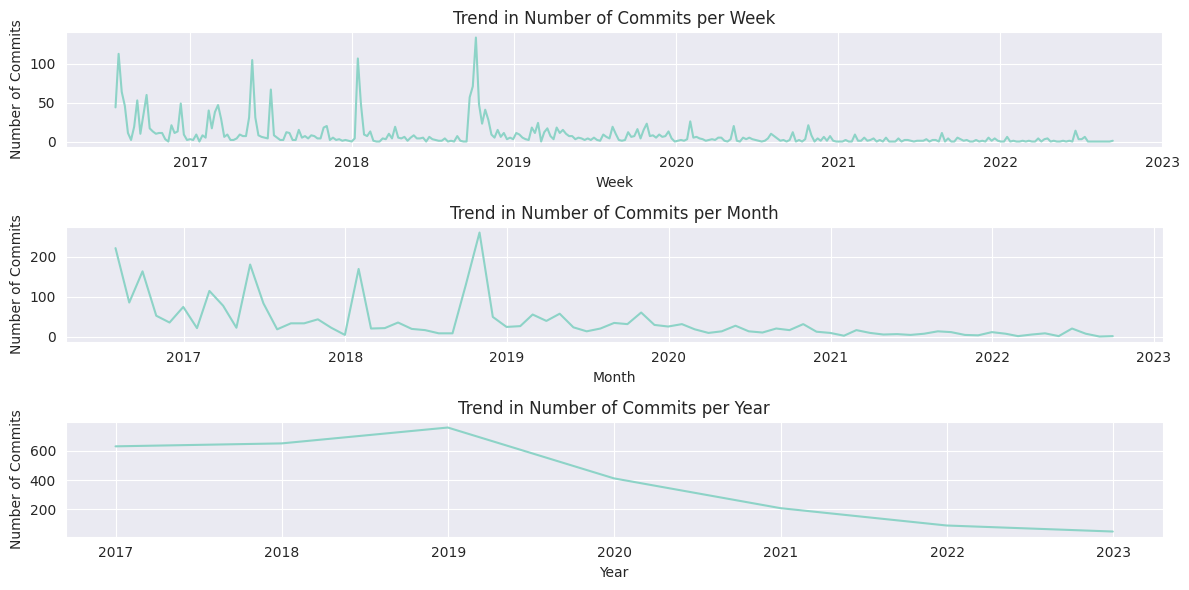

In [418]:
df.set_index('Updated at', inplace=True)

commits_per_week = df.resample('W').size().reset_index(name='Commit Count')

commits_per_month = df.resample('M').size().reset_index(name='Commit Count')

commits_per_year = df.resample('Y').size().reset_index(name='Commit Count')

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
sns.lineplot(x='Updated at', y='Commit Count', data=commits_per_week)
plt.title('Trend in Number of Commits per Week')
plt.xlabel('Week')
plt.ylabel('Number of Commits')

plt.subplot(3, 1, 2)
sns.lineplot(x='Updated at', y='Commit Count', data=commits_per_month)
plt.title('Trend in Number of Commits per Month')
plt.xlabel('Month')
plt.ylabel('Number of Commits')

plt.subplot(3, 1, 3)
sns.lineplot(x='Updated at', y='Commit Count', data=commits_per_year)
plt.title('Trend in Number of Commits per Year')
plt.xlabel('Year')
plt.ylabel('Number of Commits')

plt.tight_layout()
plt.show()

**Size of files changed over time**

In [419]:
df

,Commit Message,Author Name,Author Email,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count,Email Type
Updated at,,,,,,,,,
2016-07-15 16:46:37,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,"[LICENSE, PATENTS, README.md]",vjeux,True,14,3,gmail.com
2016-07-15 17:52:45,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,"[.gitignore, build/bundle.js, cli.js, index.cs...",vjeux,True,56,8,fb.com
2016-07-15 19:07:31,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,"[.babelrc, .gitignore, build/bundle.js, devSer...",gaearon,True,30,13,gmail.com
2016-07-15 19:08:21,Explain what it is,Dan Abramov,dan.abramov@gmail.com,[README.md],gaearon,True,18,1,gmail.com
2016-07-15 19:58:47,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,"[.eslintrc, devServer.js, package.json, src/Ap...",gaearon,True,28,6,gmail.com
...,...,...,...,...,...,...,...,...,...
2022-07-05 18:48:07,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-a-router.md],matrush,False,89,1,qq.com
2022-07-05 18:48:30,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/deployment.md],matrush,False,85,1,qq.com
2022-07-05 18:49:51,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-typescript.md],matrush,False,107,1,qq.com


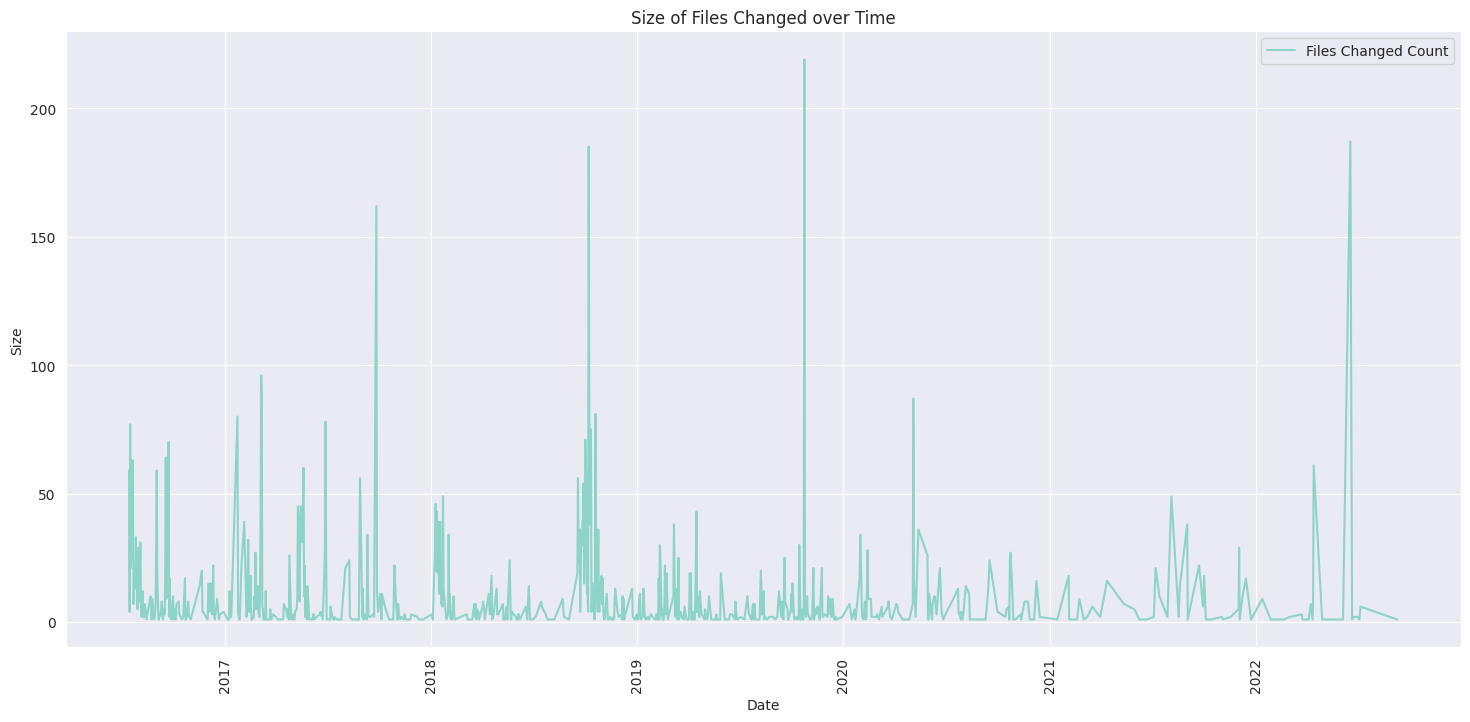

In [420]:
sns.set_style("darkgrid")

daily_counts = df.copy()
daily_counts['Date'] = pd.to_datetime(daily_counts.index).date
daily_counts = daily_counts.groupby('Date')['Files Changed Count'].sum().reset_index()

plt.figure(figsize=(18, 8))
sns.lineplot(x='Date', y='Files Changed Count', data=daily_counts, label='Files Changed Count')

plt.xlabel('Date')
plt.xticks(rotation=90)

plt.ylabel('Size')

plt.title('Size of Files Changed over Time')

plt.legend()

plt.show()

In [421]:
daily_counts

,Date,Files Changed Count
0,2016-07-15,59
1,2016-07-16,4
2,2016-07-17,77
3,2016-07-18,21
4,2016-07-19,26
...,...,...
770,2022-06-23,2
771,2022-06-30,2
772,2022-07-03,1
773,2022-07-05,6


**Size of message commits over time**

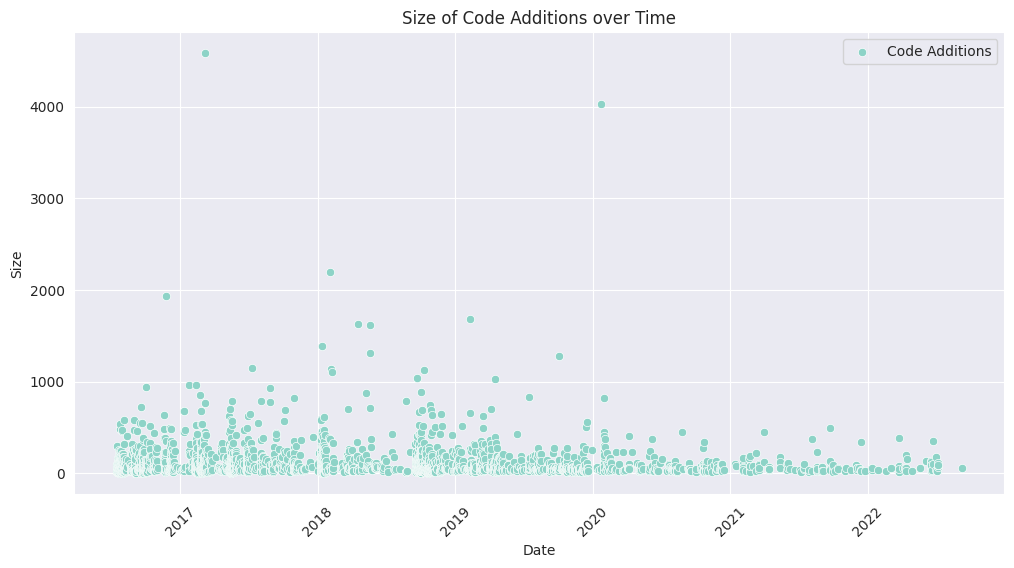

In [422]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Updated at', y='Additions commit', data=df, label='Code Additions')
# Set the x-axis label and rotate the tick labels for better visibility
plt.xlabel('Date')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Size')

# Set the title of the plot
plt.title('Size of Code Additions over Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

**Compare the number of commits for each Author Name**

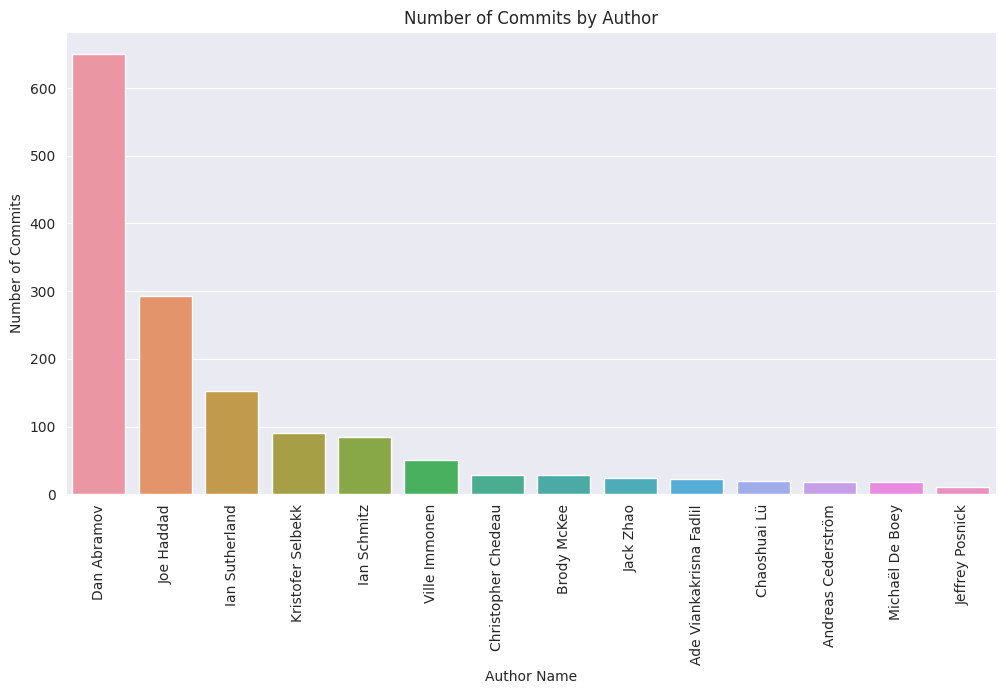

In [423]:
commit_counts = df['Author Name'].value_counts().reset_index()

commit_counts.columns = ['Author Name', 'Commit Count']

commit_counts = commit_counts[commit_counts['Commit Count'] > 10]


sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Author Name', y='Commit Count', data=commit_counts)

plt.xlabel('Author Name')
plt.xticks(rotation=90)

plt.ylabel('Number of Commits')

plt.title('Number of Commits by Author')

plt.show()

**Compare the email type counts**

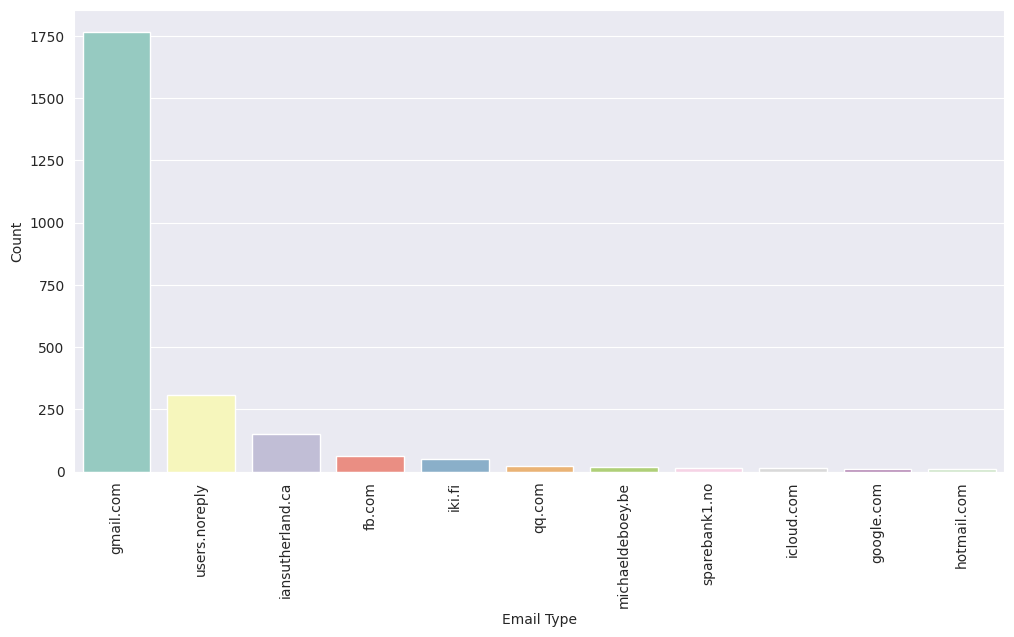

In [424]:
email_type_counts = df['Email Type'].value_counts()
email_type_counts = email_type_counts[email_type_counts > 10]

sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.barplot(x = email_type_counts.index, y = email_type_counts.values)

plt.xlabel('Email Type')

plt.xticks(rotation=90)

plt.ylabel('Count')

plt.show()

Pie chart display the distribution of the "Email Type" column

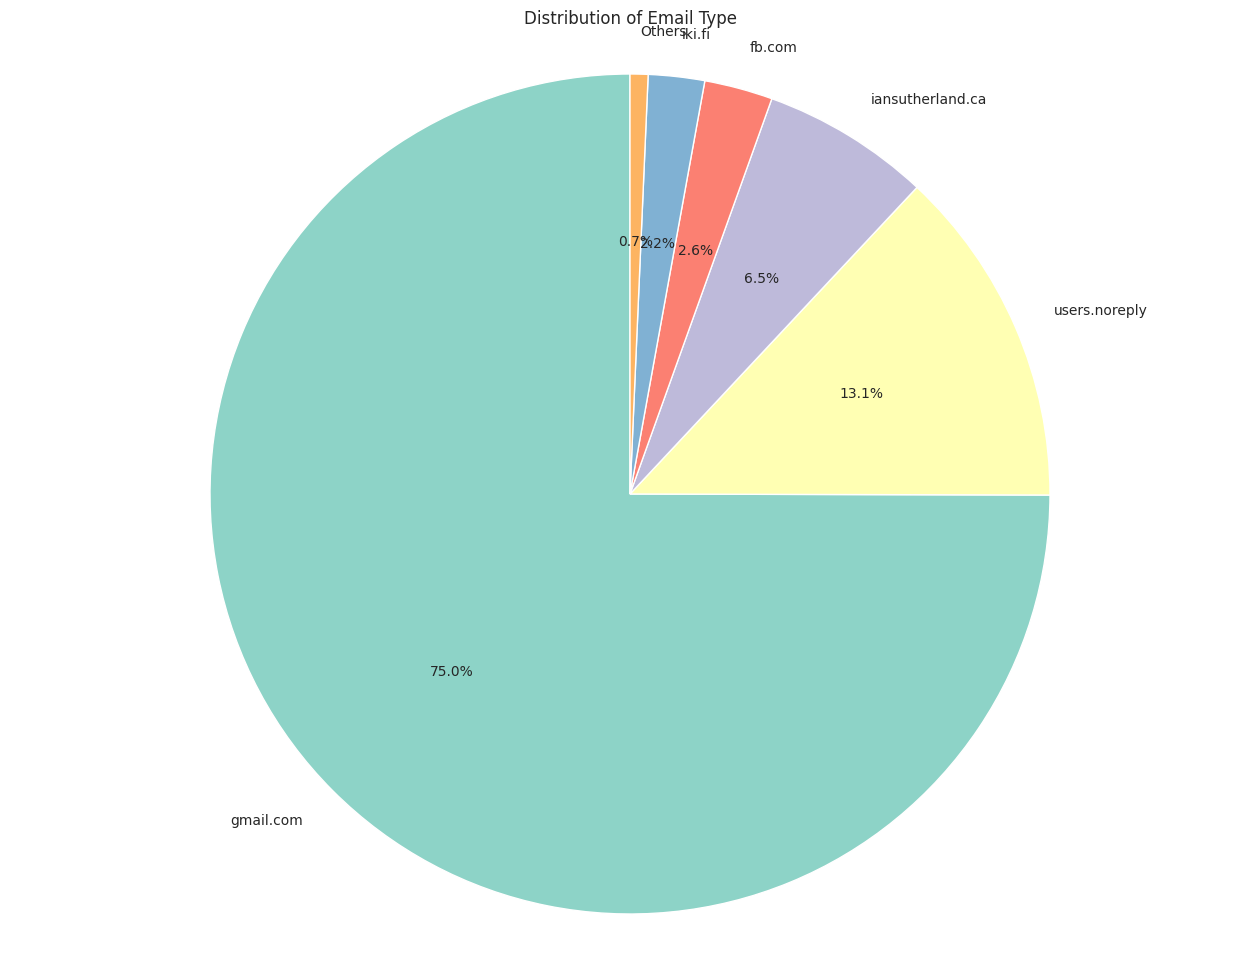

In [425]:
email_type_counts = df['Email Type'].value_counts()
email_type_percentages = (email_type_counts / len(df)) * 100
small_email = email_type_percentages[email_type_percentages < 1]
email_type_counts['Others'] = small_email.sum()

email_type_counts = email_type_counts.drop(small_email.index)

plt.figure(figsize=(16, 12))
plt.pie(email_type_counts, labels=email_type_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Email Type')

plt.axis('equal')

plt.show()

**Commit Validation**

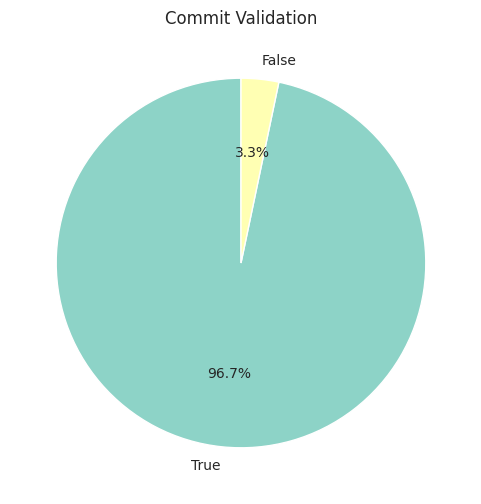

In [426]:
validation_counts = df['All Checks Passed'].value_counts()

plt.figure(figsize = (6, 6))
sns.set_palette("Set3")
sns.set_style("whitegrid")
plt.pie(validation_counts, labels=validation_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Commit Validation')

plt.show()

Text(0.5, 1.0, 'Distribution of All Checks Passed')

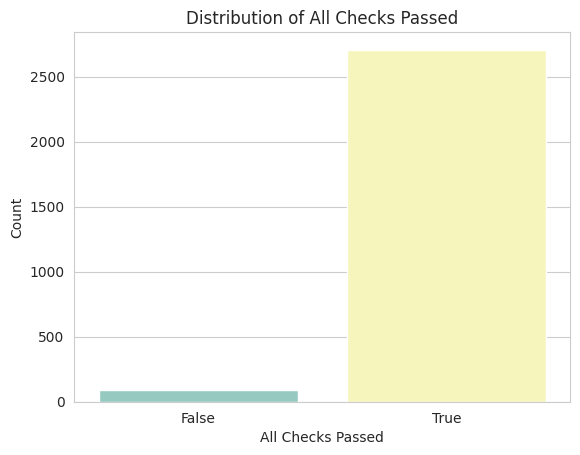

In [427]:
sns.countplot(data = df, x = "All Checks Passed")

plt.xlabel('All Checks Passed')
plt.ylabel('Count')
plt.title('Distribution of All Checks Passed')

**Visualize the number of each file changed in commit history data**

In [428]:
df_exploded = df.explode('Files Changed')

file_counts = df_exploded['Files Changed'].value_counts()
file_counts = file_counts[file_counts >= 20]
file_counts

packages/react-scripts/package.json               392
packages/react-scripts/template/README.md         296
packages/react-dev-utils/package.json             199
package.json                                      192
README.md                                         192
                                                 ... 
appveyor.yml                                       23
packages/cra-template-typescript/template.json     23
package-lock.json                                  21
docusaurus/docs/using-the-public-folder.md         21
tasks/local-test.sh                                20
Name: Files Changed, Length: 70, dtype: int64

Text(0.5, 1.0, 'File Counts')

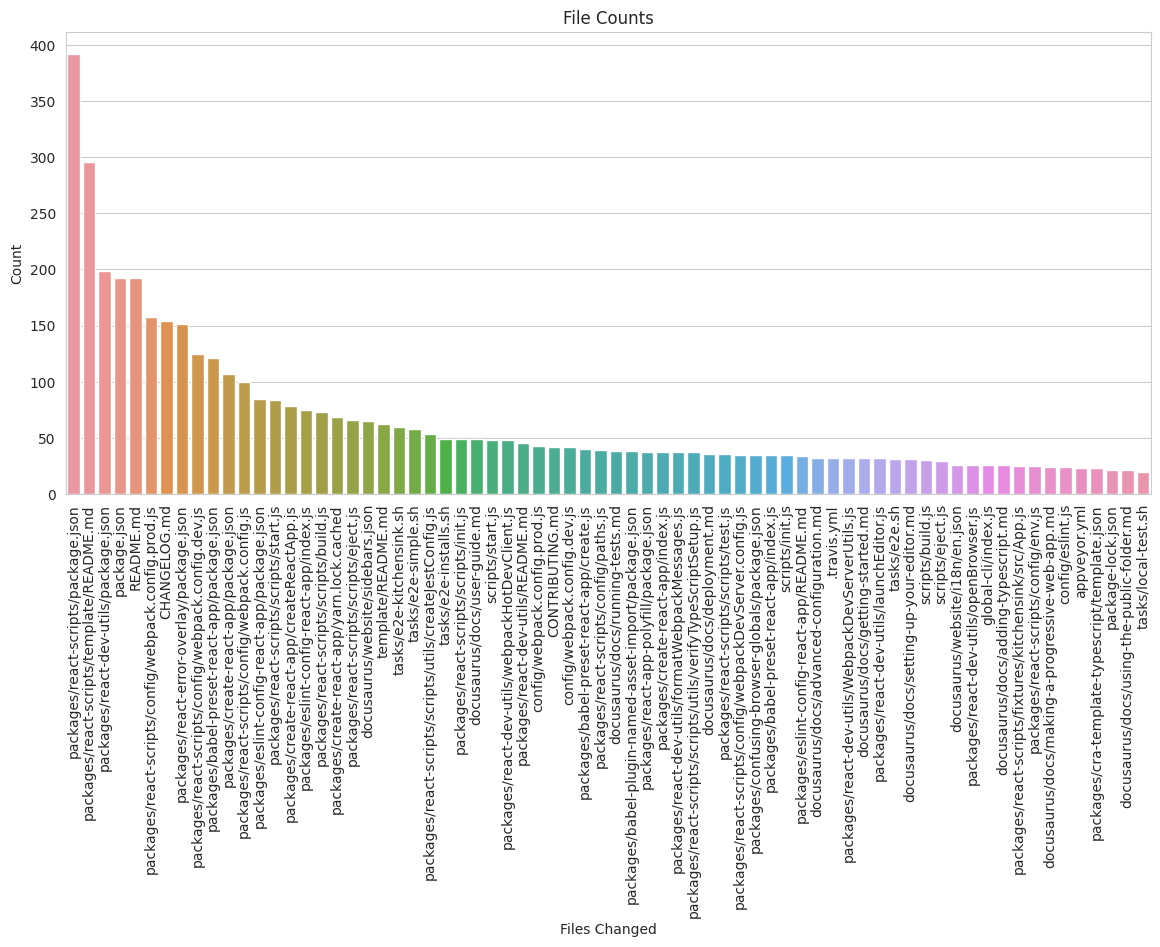

In [429]:
plt.figure(figsize=(14, 6))
sns.barplot(x=file_counts.index, y=file_counts.values)
plt.xticks(rotation = 90)
plt.xlabel('Files Changed')
plt.ylabel('Count')
plt.title('File Counts')

**Plot that display the Relationship between Additions commit and Files Changed Count**

In [430]:
df

,Commit Message,Author Name,Author Email,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count,Email Type
Updated at,,,,,,,,,
2016-07-15 16:46:37,Initial commit,Christopher Chedeau,vjeuxx@gmail.com,"[LICENSE, PATENTS, README.md]",vjeux,True,14,3,gmail.com
2016-07-15 17:52:45,Initial commit with webpack and css/autoprefix...,Christopher Chedeau,vjeux@fb.com,"[.gitignore, build/bundle.js, cli.js, index.cs...",vjeux,True,56,8,fb.com
2016-07-15 19:07:31,"Add some ""basic"" configuration",Dan Abramov,dan.abramov@gmail.com,"[.babelrc, .gitignore, build/bundle.js, devSer...",gaearon,True,30,13,gmail.com
2016-07-15 19:08:21,Explain what it is,Dan Abramov,dan.abramov@gmail.com,[README.md],gaearon,True,18,1,gmail.com
2016-07-15 19:58:47,Add linting and nicer output,Dan Abramov,dan.abramov@gmail.com,"[.eslintrc, devServer.js, package.json, src/Ap...",gaearon,True,28,6,gmail.com
...,...,...,...,...,...,...,...,...,...
2022-07-05 18:48:07,Merge pull request #12539 from liam-mulhall/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-a-router.md],matrush,False,89,1,qq.com
2022-07-05 18:48:30,Merge pull request #12531 from MoshiulRabbi/pa...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/deployment.md],matrush,False,85,1,qq.com
2022-07-05 18:49:51,Merge pull request #12537 from pawelskowronek/...,Chaoshuai Lü,matrush@qq.com,[docusaurus/docs/adding-typescript.md],matrush,False,107,1,qq.com


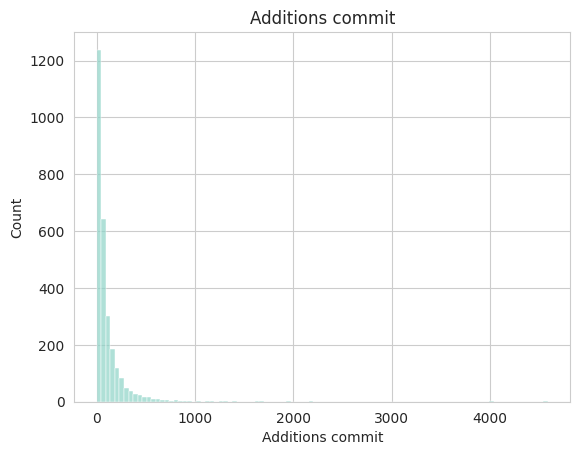

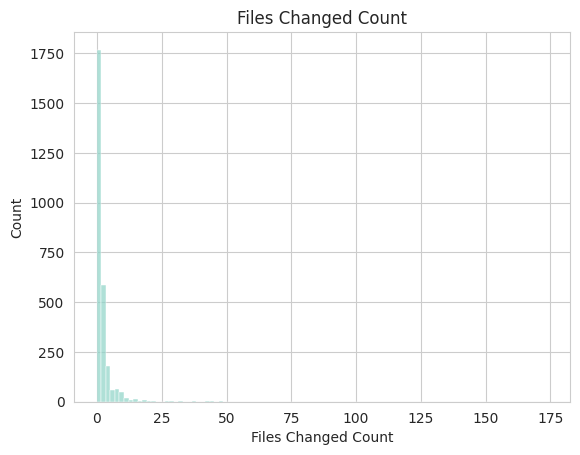

In [431]:
df_num = df[['Additions commit', 'Files Changed Count']]
for i in df_num.columns:
  sns.histplot(data = df_num[i], bins = 100, alpha = 0.7)
  plt.title(i)
  plt.show()

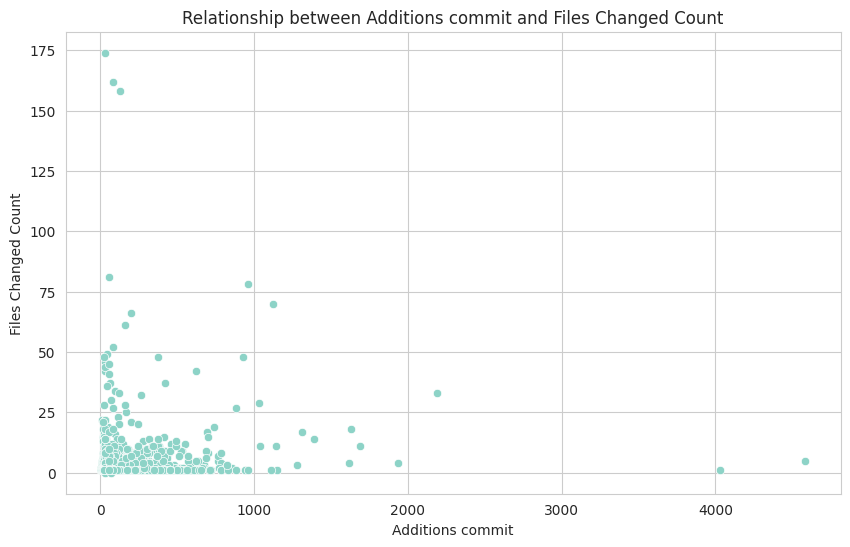

In [432]:
df_num = df[['Additions commit', 'Files Changed Count']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_num, x='Additions commit', y='Files Changed Count')
plt.title('Relationship between Additions commit and Files Changed Count')
plt.xlabel('Additions commit')
plt.ylabel('Files Changed Count')
plt.show()

Text(0, 0.5, 'Density')

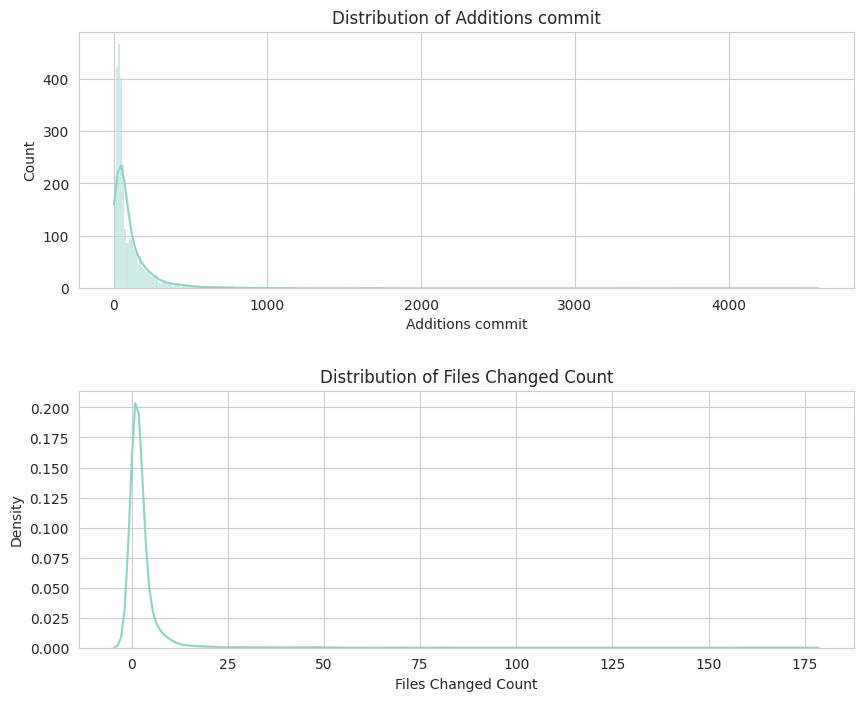

In [433]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots

sns.histplot(data=df_num, x='Additions commit', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Additions commit')
axes[0].set_xlabel('Additions commit')
axes[0].set_ylabel('Count')

sns.kdeplot(data=df_num, x='Files Changed Count', ax=axes[1])
axes[1].set_title('Distribution of Files Changed Count')
axes[1].set_xlabel('Files Changed Count')
axes[1].set_ylabel('Density')

                     Additions commit  Files Changed Count
Additions commit             1.000000             0.136018
Files Changed Count          0.136018             1.000000


<Axes: >

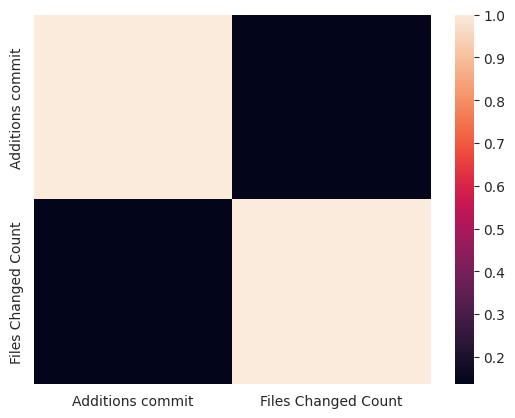

In [434]:
print(df_num.corr())
sns.heatmap(df_num.corr())

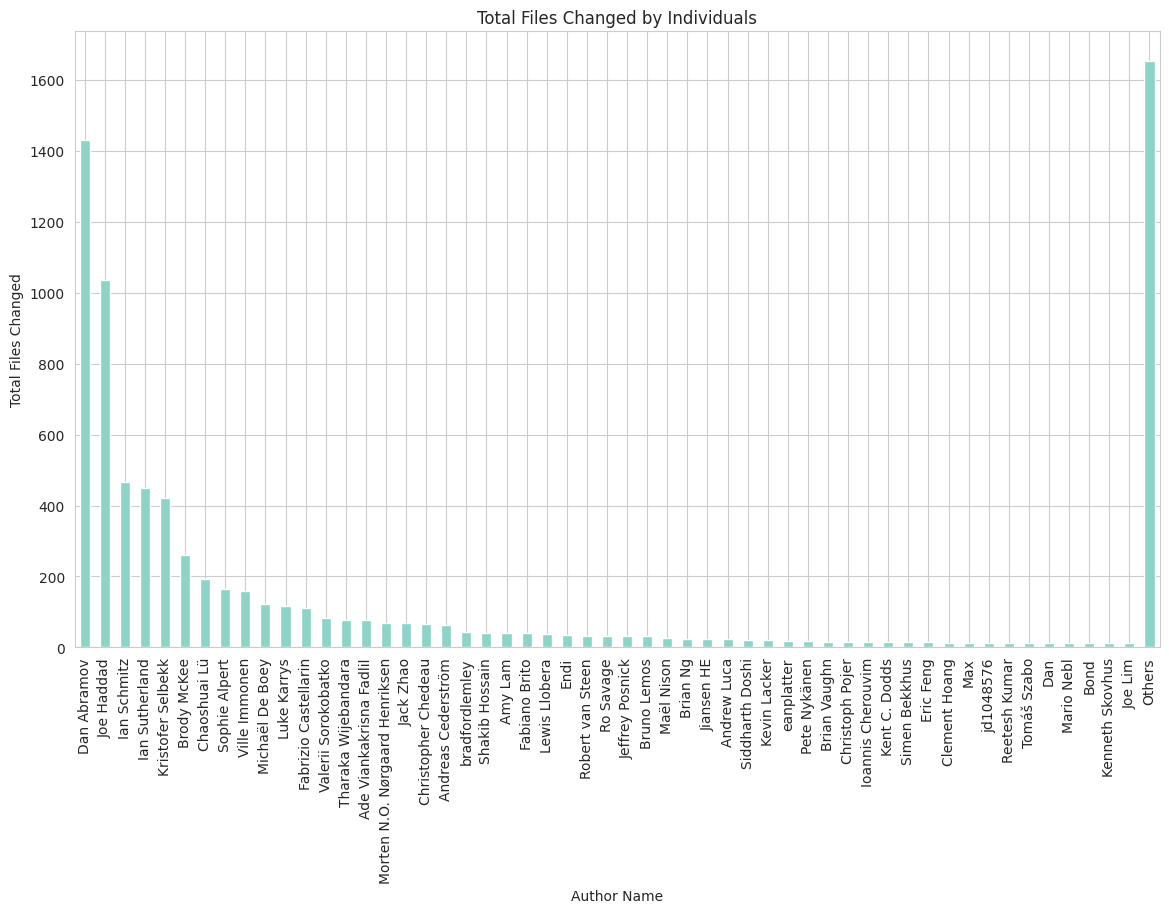

In [435]:
filtered_authors = total_file_changed_sorted[total_file_changed < 11]
filtered_count = filtered_authors.sum()
total_file_changed_sorted['Others'] = filtered_count
total_file_changed_sorted = total_file_changed_sorted[total_file_changed_sorted > 11]

plt.figure(figsize=(14, 8))
total_file_changed_sorted.plot(kind='bar')
plt.title("Total Files Changed by Individuals")
plt.xlabel("Author Name")
plt.ylabel("Total Files Changed")
plt.xticks(rotation=90)
plt.show()

# Future Work


**Use Kmeans clustering to group commits or contributors based on similarities in their characteristics**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


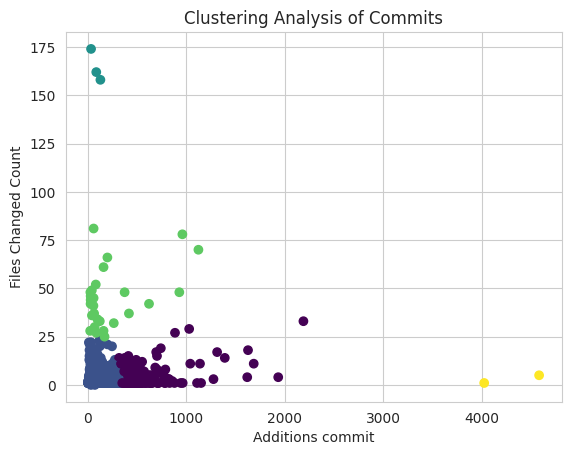

In [436]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns_for_clustering = ['Additions commit', 'Files Changed Count']

data_for_clustering = df[columns_for_clustering]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_

plt.scatter(data_for_clustering['Additions commit'], data_for_clustering['Files Changed Count'], c=cluster_labels, cmap='viridis')
plt.xlabel('Additions commit')
plt.ylabel('Files Changed Count')
plt.title('Clustering Analysis of Commits')
plt.show()